In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
#対象確率分布
def dist_hydrogen(x):
    a=0.9
    if x<0:
        return 0
    elif x>0 and x<20:
        return (x**2)*(4*math.pow(a,3))*np.exp(-2*a*x)
    else:
        return 0

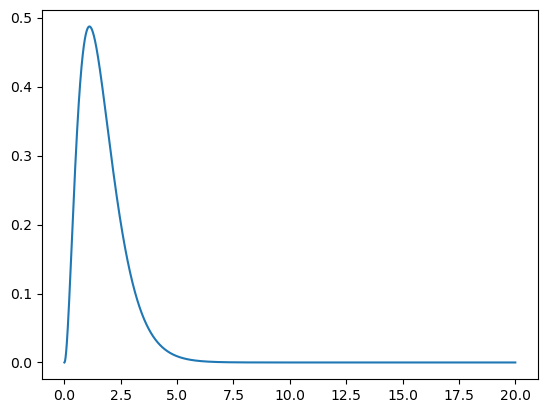

In [5]:
#局所エネルギー    
def local_hygen(x):
    a=0.9
    return -(1/x)-0.5*a*(a-(2/x))
  
    

a=np.linspace(0,20,10000)
b=np.linspace(0,10,10000)
for i in range(10000):
    b[i]=dist_hydrogen(a[i])
    
plt.plot(a,b)
plt.show()

In [6]:
# pi[0]
sigma=8.25



#　MHアルゴリズム
def MHsampling_energy(T):
    pi = np.zeros(T, dtype=float)
    #pi[0] = np.random.random()
    pi[0]=sigma
    ener=local_hygen(pi[0])
    ener_now=np.zeros(T, dtype=float)
    ener_now[0]=ener/1
    t = 0
    while t < T - 1:
        t = t + 1
        pi_star = np.random.normal(pi[t - 1], 1, size=1)
        alpha = min(1, (dist_hydrogen(pi_star[0]) / dist_hydrogen(pi[t - 1])))
        u = np.random.uniform()

        if u < alpha:
            pi[t] = pi_star[0]
        else:
            pi[t] = pi[t - 1]
        ener+=  local_hygen(pi[t])
        ener_now[t]=ener/(t+1)
        
    return ener_now



def MHsampling_energy2(T):
    pi = np.zeros(T, dtype=float)
    #pi[0] = np.random.random()
    pi[0]=sigma
    ener=local_hygen(pi[0])
    ener_now=np.zeros(T, dtype=float)
    ener_now[0]=ener/1
    t = 0
    while t < T - 1:
        t = t + 1
        pi_star = np.random.normal(pi[t - 1], 1, size=1)
        
        if dist_hydrogen(pi_star[0])<dist_hydrogen(pi[t-1]):
            alpha=(dist_hydrogen(pi_star[0])/dist_hydrogen(pi[t-1]))**2
        else:
            alpha=dist_hydrogen(pi[t-1])/dist_hydrogen(pi_star[0])
        
        u = np.random.uniform()

        if u < alpha:
            pi[t] = pi_star[0]
        else:
            pi[t] = pi[t - 1]
        ener+=  local_hygen(pi[t])
        ener_now[t]=ener/(t+1)
    return ener_now

#f(z)=z/z+1
def MHsampling_energy3(T):
    pi = np.zeros(T, dtype=float)
    #pi[0] = np.random.random()
    pi[0]=sigma
    ener=local_hygen(pi[0])
    ener_now=np.zeros(T, dtype=float)
    ener_now[0]=ener/1
    t = 0
    while t < T - 1:
        t = t + 1
        pi_star = np.random.normal(pi[t - 1], 1, size=1)
        
        z=dist_hydrogen(pi_star[0])/dist_hydrogen(pi[t-1])
        
        alpha = z/(z+1)
        u = np.random.uniform()

        if u < alpha:
            pi[t] = pi_star[0]
        else:
            pi[t] = pi[t - 1]
        ener+=  local_hygen(pi[t])
        ener_now[t]=ener/(t+1)
    return ener_now


def MHsampling_energy4(T):
    pi = np.zeros(T, dtype=float)
    #pi[0] = np.random.random()
    pi[0]=sigma
    ener=local_hygen(pi[0])
    ener_now=np.zeros(T, dtype=float)
    ener_now[0]=ener/1
    t = 0

    for i in range(0,T-1):
        t=t+1
        pi_star = np.random.normal(pi[t - 1], 1, size=1)
        alpha = min(1, (dist_hydrogen(pi_star[0]) / dist_hydrogen(pi[t - 1])))
        u = np.random.uniform()
        if u < alpha:
            pi[t] = pi_star[0]
        while u>=alpha:
            pi_star = np.random.normal(pi[t - 1], 1, size=1)
            alpha = min(1, (dist_hydrogen(pi_star[0]) / dist_hydrogen(pi[t - 1])))
            u = np.random.uniform()
            if u < alpha:
                pi[t] = pi_star[0]
                break
        ener+=  local_hygen(pi[t])
        ener_now[t]=ener/(t+1)
    return ener_now

In [7]:
T=60000

pinow=MHsampling_energy(T)
pinow2=MHsampling_energy2(T)
pinow3=MHsampling_energy3(T)
pinow4=MHsampling_energy4(T)

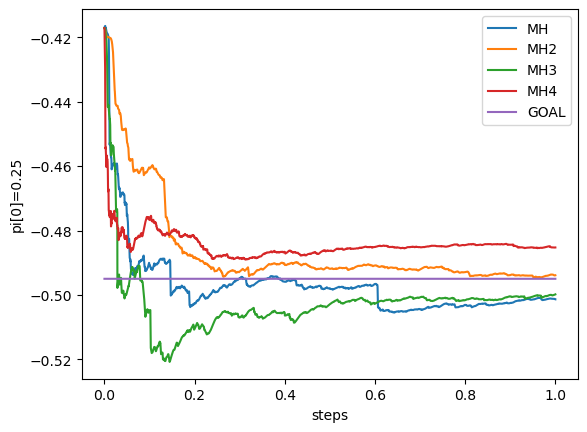

In [8]:
step=4000
a=np.linspace(0,1,step)
b=[-0.495]*step
plt.plot(a,pinow[:step],label = "MH")
plt.plot(a,pinow2[:step],label = "MH2")
plt.plot(a,pinow3[:step],label = "MH3")
plt.plot(a,pinow4[:step],label = "MH4")
plt.plot(a,b,label = "GOAL")

plt.xlabel("steps")
plt.ylabel("pi[0]=0.25")

plt.legend()
plt.show()